# Modeling CO2 Emissions through Gradient Descent

In [1]:
#1b9e77 
#d95f02
#7570b3
#e7298a
#e6ab02

## **Setup**

#### **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### **Loading Data**


In [3]:
df = pd.read_csv('annual_global_CO2_levels', 
                 delimiter = "\t", 
                 names = ["Year", "CO2 Level"], 
                 skiprows = 1)

#### **Graphing Data**

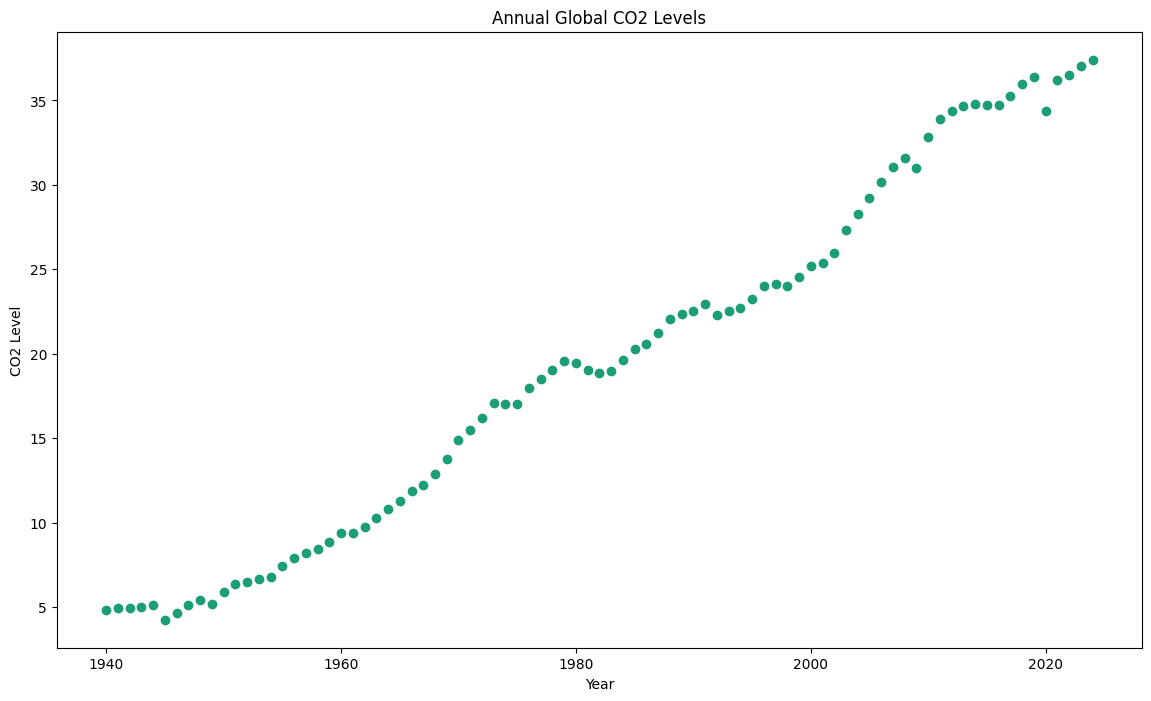

In [4]:
plt.figure(figsize = (14, 8))
plt.scatter(df['Year'], df['CO2 Level'], color = '#1b9e77', label = 'Data')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Annual Global CO2 Levels')
plt.show()

#### **Scaling Data**

Scaling is required here because the x-values are in thousands and the y-values are in single or double digits.

In [5]:
x_values = df['Year'].values.astype(np.float32)
x_values = (x_values - x_values.min()) / (x_values.max() - x_values.min())

y_values = df['CO2 Level'].values.astype(np.float32)
y_values = (y_values - y_values.min()) / (y_values.max() - y_values.min())

#### **Splitting Data**

Splitting the data into training, validation, and testing sets.

In [6]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x_values, y_values, test_size = 0.2, random_state = 13)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.2, random_state = 13)

## **Modeling**

### **Linear Model**

We begin with a simple linear model as the data exhibits an approximately linear trend:

$$y = mx + b$$

In [7]:
def linearModel(m: float, b: float, set:np.ndarray) -> float:
    return m * set + b

To visualize the initial model, we set arbitrary initial values for m and b to reasonably fit the data:

In [8]:
m = 1.0
b = 0.0

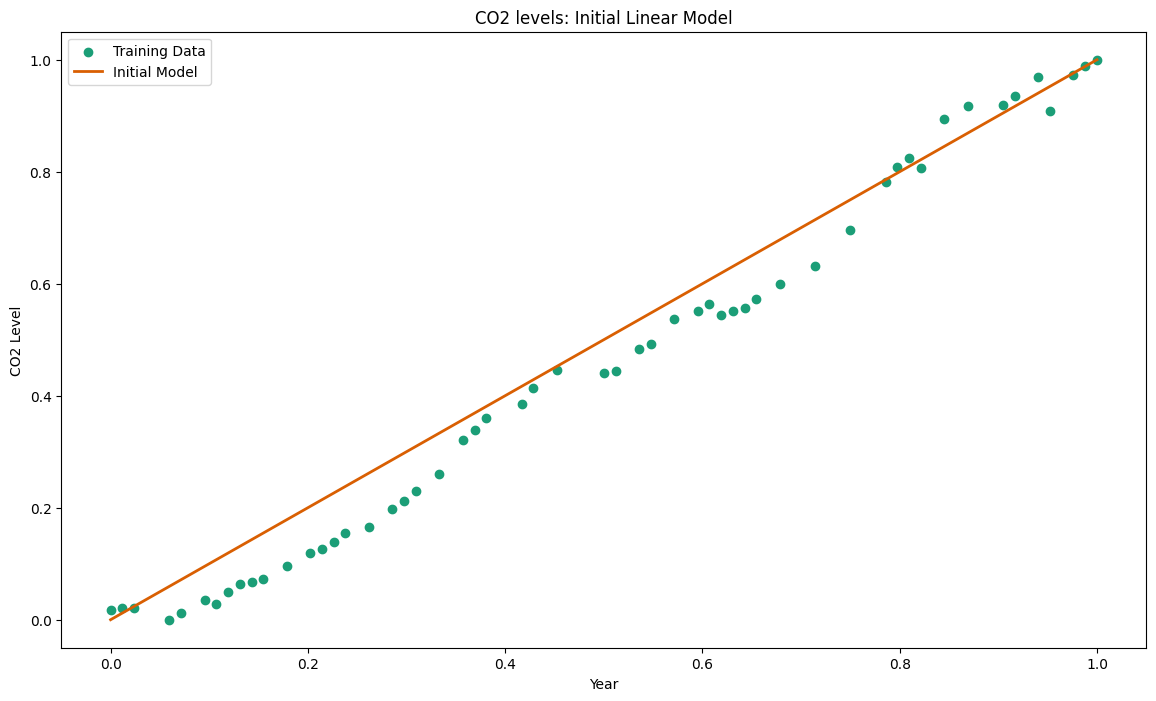

In [9]:
x = np.linspace(0, 1, 100)
y = linearModel(m, b, x)

plt.figure(figsize = (14, 8))
plt.scatter(x_train, y_train, color = '#1b9e77', label = 'Training Data')
plt.plot(x, y, linewidth = 2, color = '#d95f02', label = 'Initial Model')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('CO2 levels: Initial Linear Model')
plt.legend()
plt.show()

This initial visualization provides a reasonable starting point for fitting the model. Next, we use gradient descent to optimize m and b, minimizing the error between predicted and actual values.

#### **Gradient Descent**

The optimization will use the mean absolute error (MAE) as the metric:

$$ E = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

In [10]:
def linearError(m: float, b: float, x:np.ndarray, y:np.ndarray) -> float:
    return np.mean((np.abs(linearModel(m, b, x) - y)))

To perform gradient descent, we calculate the partial derivatives of the error function with respect to m and b:


$$ \frac{\partial E}{\partial m} = \frac{1}{n} \sum_{i=1}^{n} \text{sign}(\hat{y}_i - y_i) \cdot x_i $$ 

$$ \frac{\partial E}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} \text{sign}(\hat{y}_i - y_i) $$

Before starting the gradient descent loop, we define the learning rate and number of iterations (epochs). These hyperparameters ensure the model converges efficiently without overfitting.

In [11]:
# Hyperparameters
learning_rate = 1E-3
epochs = 300

In [12]:
# Epoch data 
training_loss = []
validation_loss = []

# Training loop
for epoch in range(epochs):
    y_pred_train = m * x_train + b

    dm = np.mean(np.sign(y_pred_train - y_train) * x_train)
    db = np.mean(np.sign(y_pred_train - y_train))

    m = m - learning_rate * dm
    b = b - learning_rate * db

    y_pred_train = m * x_train + b
    loss = np.mean(np.abs(y_pred_train - y_train))
    training_loss.append(loss)

    y_pred_val = m * x_val + b
    val_loss = np.mean(np.abs(y_pred_val - y_val))
    validation_loss.append(val_loss)

    if epoch % 50 == 0:
        print(f'Epoch {epoch}: loss = {loss}')

# Print final loss and parameters
print("---------------------------------------")
print(f'Final Training Loss: {linearError(m, b, x_train, y_train)}')
print(f'Final Validation Loss: {linearError(m, b, x_val, y_val)}')
print(f'm: {m}, b: {b}')

Epoch 0: loss = 0.04978134110569954
Epoch 50: loss = 0.040442731231451035
Epoch 100: loss = 0.03656311333179474
Epoch 150: loss = 0.035202234983444214
Epoch 200: loss = 0.03437954932451248
Epoch 250: loss = 0.0335826575756073
---------------------------------------
Final Training Loss: 0.03280109912157059
Final Validation Loss: 0.04195020720362663
m: 1.011652555491786, b: -0.05520370377600153


#### **Convergence Criteria**

To confirm convergence, we analyze the error on both the training and validation sets over the epochs:

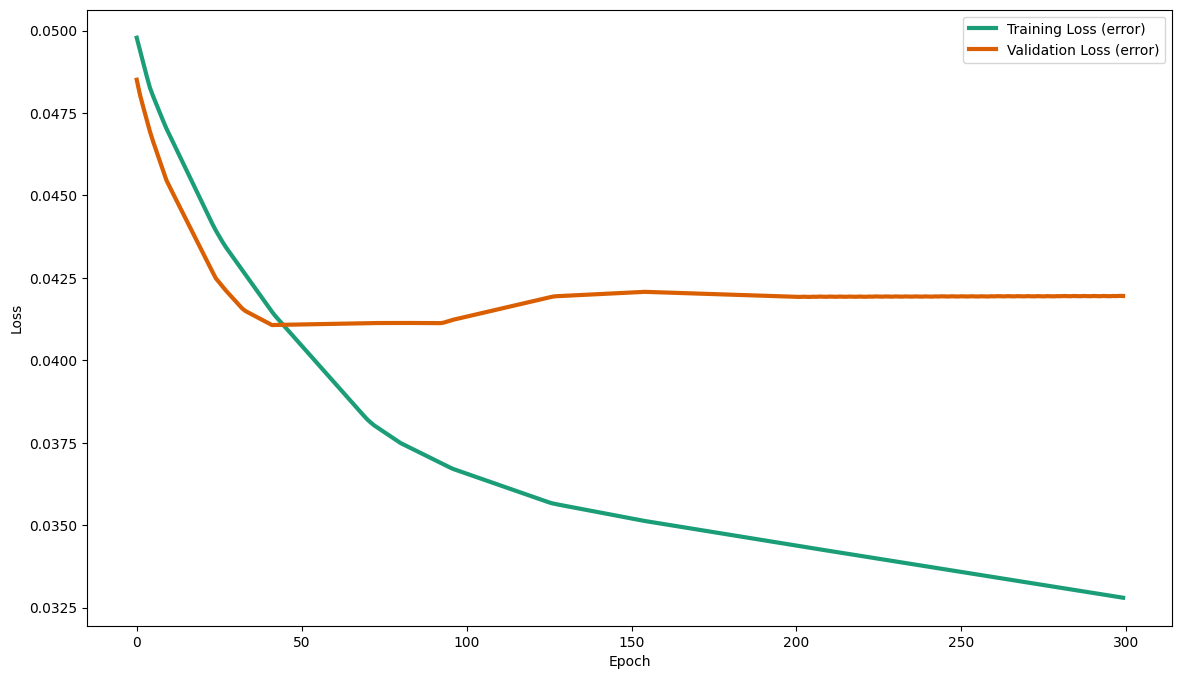

In [13]:
plt.figure(figsize = (14, 8))
plt.plot(training_loss, label='Training Loss (error)', linewidth = 3, color = '#1b9e77')
plt.plot(validation_loss, label='Validation Loss (error)', linewidth = 3, color = '#d95f02')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the plot, the model converges after approximately 40 epochs, with the validation loss stabilizing. This plateau suggests that the model is neither overfitting nor underfitting and meets the convergence criteria.

#### **Final Linear Model** 

Using the optimized parameters, we visualize the final linear model alongside the training and testing data:

/var/folders/4z/1s07dvg55sq1ks6sghlxv2rh0000gn/T/ipykernel_79805/2704521482.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', linewidth = 2, color = '#d95f02', label = 'Linear Model')


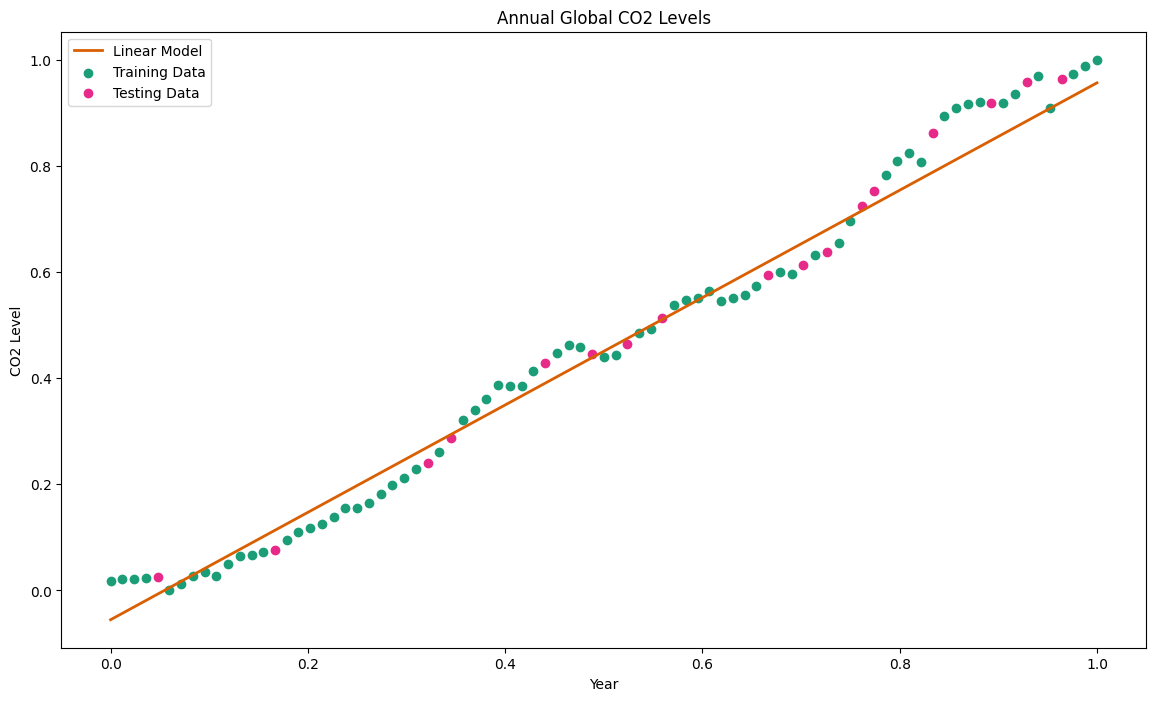

In [14]:
x = np.linspace(0, 1, 100)
y = linearModel(m, b, x)

plt.figure(figsize = (14, 8))
plt.plot(x, y, 'r', linewidth = 2, color = '#d95f02', label = 'Linear Model')
plt.scatter(x_train_val, y_train_val, color = '#1b9e77', label = 'Training Data')
plt.scatter(x_test, y_test, color = '#e7298a', label = 'Testing Data') 
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Annual Global CO2 Levels')
plt.legend()
plt.show()

The resulting model fits the data as:

$$ y = 1.01x - 0.05$$

The average error on the training set is about 3.2% which is reasonable. The model’s predictions on the validation set are off by avergae 4.2% which is also acceptable. The validations set's error is slightly larger than the training set's error, which can suggest overfitting, but because the difference is small, it is not a significant concern.

Overall, it seems like this model is a pretty good fit for the data! The slope is positive and close to 1, indicating a steady increase in CO2 emissions with increasing population, which makes sense. The errors are also quite low, making this model actually usable despite its simplicity.

---

### **Exponential Model**

Next, lets model the data using an exponential function. An exponential model is appropriate when the data suggests a rate of change that increases or decreases multiplicatively over time. In this case, the data might not be a perfect linear fit, and rather, an exponential model could better capture the trend better. 

The model can be expressed as:

$$ y = a e^{bx} + c$$

In [15]:
def exponentialModel(a: float, b: float, c:float, set:np.ndarray) -> float:
    return a * np.exp(b * set) + c

To visualize the initial model, we set arbitrary values for the parameters a, b, and c:

In [16]:
a = 1
b = 0.7
c = -1

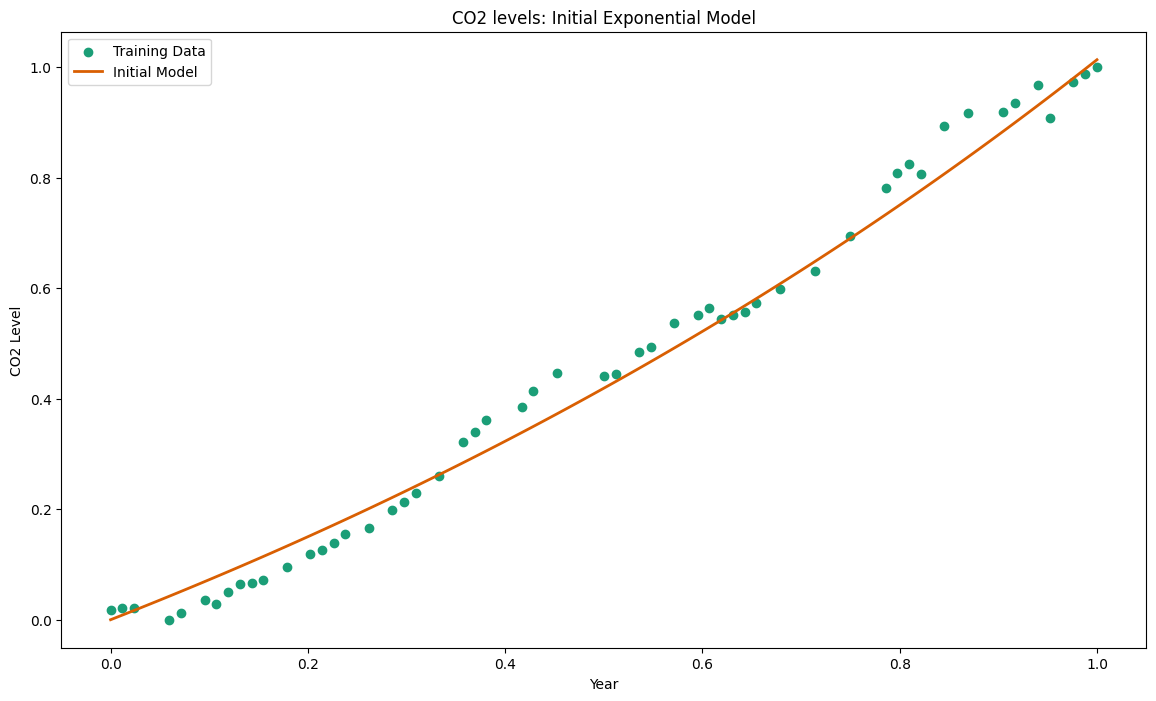

In [17]:
x = np.linspace(0, 1, 100)
y = exponentialModel(a, b, c, x)

plt.figure(figsize = (14, 8))
plt.scatter(x_train, y_train, color = '#1b9e77', label = 'Training Data')
plt.plot(x, y, linewidth = 2, color = '#d95f02', label = 'Initial Model')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('CO2 levels: Initial Exponential Model')
plt.legend()
plt.show()

This initial visualization provides a good starting point for fitting the exponential model. To optimize the parameters a, b, and c, we use gradient descent to minimize the error.

#### **Gradient Descent**

The metric for optimization is the mean absolute error (MAE):

$$ E = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

In [18]:
def exponentialError(a: float, b: float, c:float, x:np.ndarray, y:np.ndarray) -> float:
    return np.mean((np.abs(exponentialModel(a, b, c, x) - y)))

To perform gradient descent, we compute the partial derivatives of the error function with respect to a, b, and c:

$$ \frac{\partial E}{\partial a} = \frac{1}{n} \sum_{i=1}^{n} \text{sign}(\hat{y}_i - y_i) \cdot e^{bx_i} $$

$$ \frac{\partial E}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} \text{sign}(\hat{y}_i - y_i) \cdot a x_i e^{bx_i} $$

$$ \frac{\partial E}{\partial c} = \frac{1}{n} \sum_{i=1}^{n} \text{sign}(\hat{y}_i - y_i) $$

We set the learning rate and the number of epochs to control the optimization process and ensure convergence:

In [19]:
# Hyperparameters
learning_rate = 1E-3
epochs = 1000

In [20]:
# Epoch data 
training_loss = []
validation_loss = []

# Training loop
for epoch in range(epochs):
    y_pred_train = exponentialModel(a, b, c, x_train)

    # Derivatives
    da = np.mean(np.sign(y_pred_train - y_train) * np.exp(b * x_train))
    db = np.mean(np.sign(y_pred_train - y_train) * a * x_train * np.exp(b * x_train))
    dc = np.mean(np.sign(y_pred_train - y_train))

    a = m - learning_rate * da
    b = b - learning_rate * db
    c = c - learning_rate * dc

    y_pred_train = exponentialModel(a, b, c, x_train)
    loss = np.mean(np.abs(y_pred_train - y_train))
    training_loss.append(loss)

    y_pred_val = exponentialModel(a, b, c, x_val)
    val_loss = np.mean(np.abs(y_pred_val - y_val))
    validation_loss.append(val_loss)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: loss = {loss}')

# Print final loss and parameters
print("---------------------------------------")
print(f'Final Training Loss: {exponentialError(m, b, c, x_train, y_train)}')
print(f'Final Validation Loss: {exponentialError(m, b, c, x_val, y_val)}')
print(f'a: {a}, b: {b}, c: {c}')

Epoch 0: loss = 0.032826948910951614
Epoch 100: loss = 0.031209683045744896
Epoch 200: loss = 0.030186381191015244
Epoch 300: loss = 0.029161253944039345
Epoch 400: loss = 0.028552457690238953
Epoch 500: loss = 0.028020726516842842
Epoch 600: loss = 0.0277614276856184
Epoch 700: loss = 0.027538826689124107
Epoch 800: loss = 0.02749030664563179
Epoch 900: loss = 0.02744208835065365
---------------------------------------
Final Training Loss: 0.027430318295955658
Final Validation Loss: 0.04175600782036781
a: 1.01160983702914, b: 0.7359628266114752, c: -1.0500370374098464


#### **Convergence Criteria**

To ensure the model has converged, we plot the error for both the training and validation sets across all epochs:

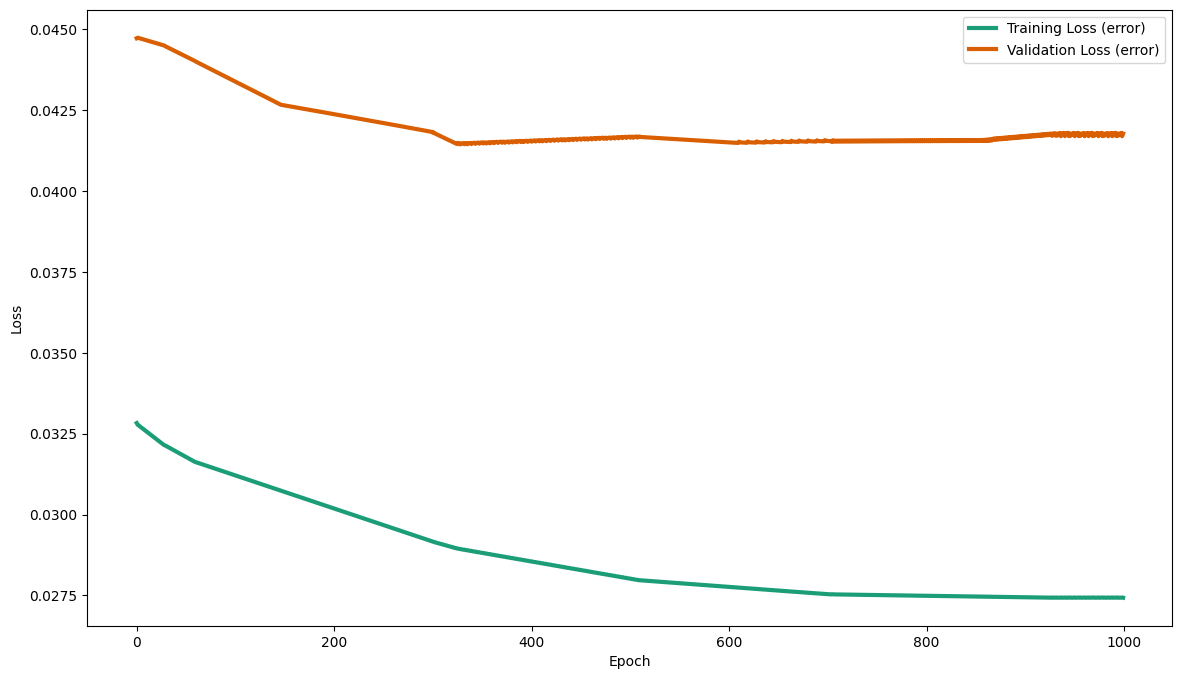

In [21]:
plt.figure(figsize = (14, 8))
plt.plot(training_loss, label='Training Loss (error)', linewidth = 3, color = '#1b9e77')
plt.plot(validation_loss, label='Validation Loss (error)', linewidth = 3, color = '#d95f02')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

This plot shows that the model converges extremely quickly, with the validation loss stabilizing after only a few epochs. The important takeaway is that firstly, the losses are reaching a plateau, and secondly, the validation loss is not significantly higher than the training loss, or increasing. So our convergence criteria are met.

#### **Final Linear Model** 

Using the optimized parameters, we visualize the final exponential model alongside the training and testing data:

/var/folders/4z/1s07dvg55sq1ks6sghlxv2rh0000gn/T/ipykernel_79805/4108832053.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', linewidth = 2, color = '#d95f02', label = 'Exponential Model')


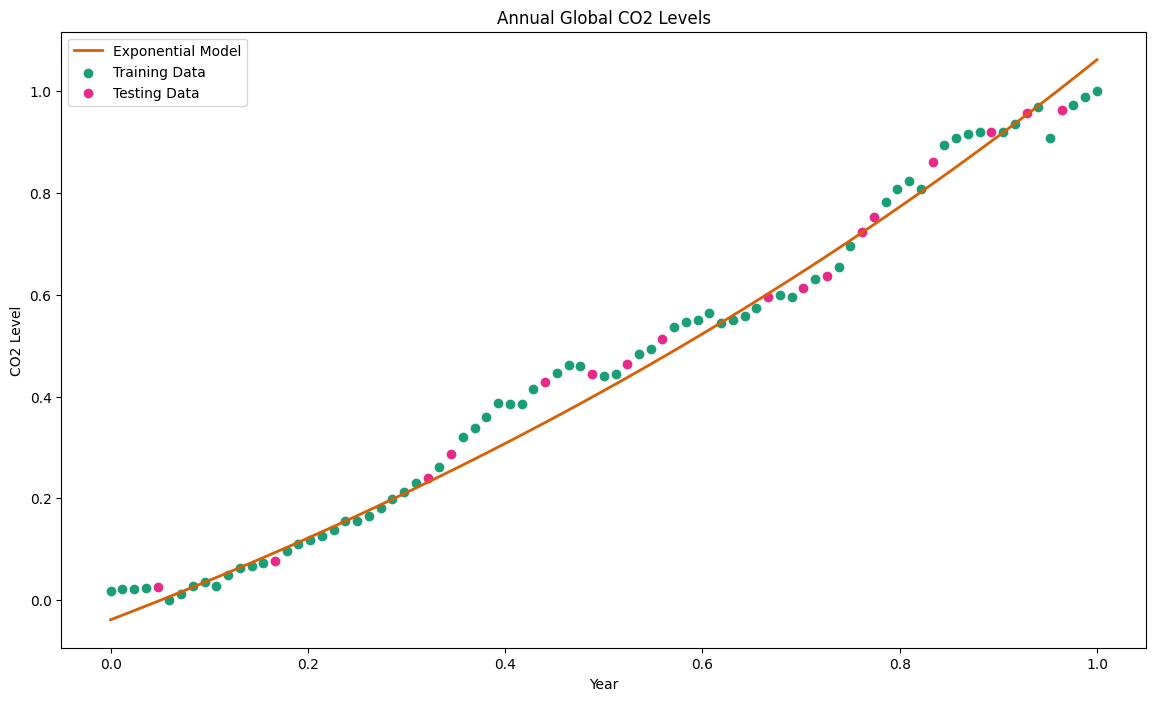

In [22]:
x = np.linspace(0, 1, 100)
y = exponentialModel(a, b, c, x)

plt.figure(figsize = (14, 8))
plt.plot(x, y, 'r', linewidth = 2, color = '#d95f02', label = 'Exponential Model')
plt.scatter(x_train_val, y_train_val, color = '#1b9e77', label = 'Training Data')
plt.scatter(x_test, y_test, color = '#e7298a', label = 'Testing Data') 
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Annual Global CO2 Levels')
plt.legend()
plt.show()

The resulting model fits the data as:

$$ y = 1.01 e^{0.73x} - 1.05$$

The average error on the training set is about 2.7% which is reasonable, and better than the previous linear model. The model’s predictions on the validation set are off by avergae 4.1% which is also acceptable. Here, although the training error is lower than the linear model, the validation error is almost similar, this suggests that the lower error in the training set can be due to variability, but also, this increases the chance of overfitting, as the difference between the training and validation errors is larger than the linear model.

Overall, the exponential model seems to be a better fit for the data than the linear model. The errors are lower, and the model captures the trend better, with the coeffiecient of x being 0.73, which is less than 1, suggesting a sub-linear increase in CO2 emissions with increasing population, which is more realistic than a linear increase.

### **Sinusoidal Model**

$$ y = a \sin(bx + c) + d$$

In [23]:
def sinModel(a: float, b: float, c:float, d:float, set:np.ndarray) -> float:
    return a * np.sin(b * set + c) + d

In [24]:
a = 1.2
b = 1.0
c = 0.0
d = 0.0

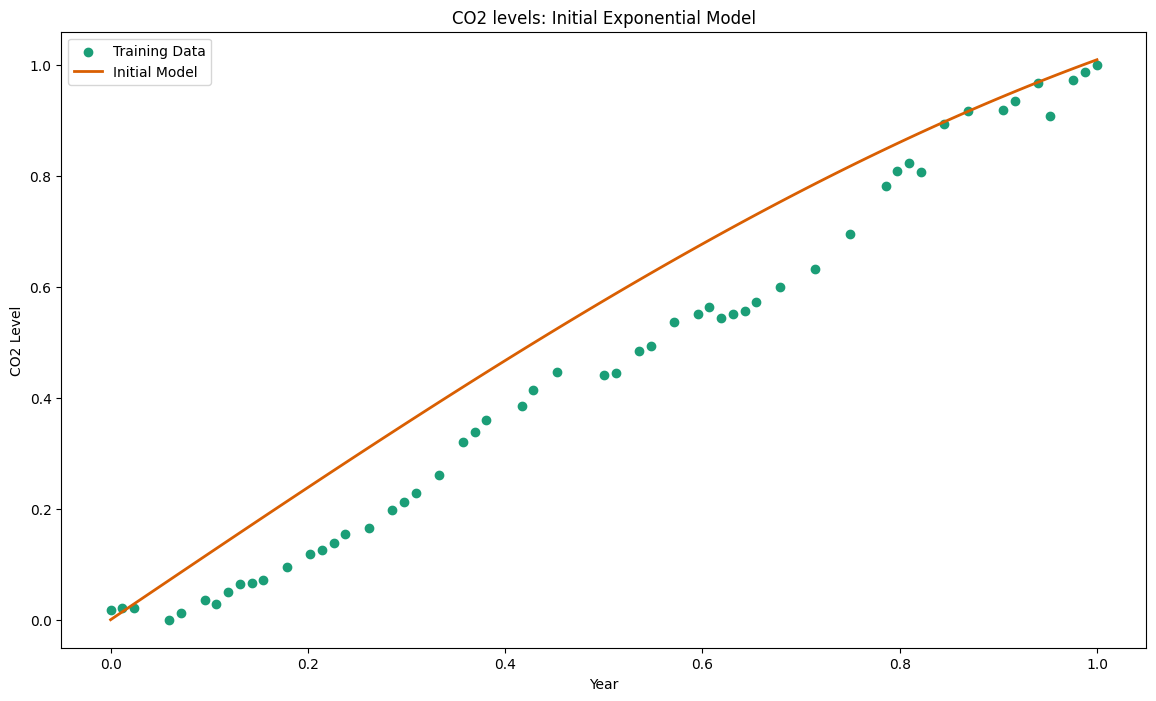

In [25]:
x = np.linspace(0, 1, 100)
y = sinModel(a, b, c, d, x)

plt.figure(figsize = (14, 8))
plt.scatter(x_train, y_train, color = '#1b9e77', label = 'Training Data')
plt.plot(x, y, linewidth = 2, color = '#d95f02', label = 'Initial Model')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('CO2 levels: Initial Exponential Model')
plt.legend()
plt.show()

In [26]:
def sinError(a: float, b: float, c:float, d:float, x:np.ndarray, y:np.ndarray) -> float:
    return np.mean((np.abs(sinModel(a, b, c, d, x) - y)))

In [27]:
# Hyperparameters
learning_rate = 1E-5
epochs = 2000

In [28]:
# Epoch data 
training_loss = []
validation_loss = []

# Training loop
for epoch in range(epochs):
    y_pred_train = sinModel(a, b, c, d, x_train)

    da = np.mean(np.sign(y_pred_train - y_train) * np.sin(b * x_train + c))
    db = np.mean(np.sign(y_pred_train - y_train) * a * x_train * np.cos(b * x_train + c))
    dc = np.mean(np.sign(y_pred_train - y_train) * a * np.cos(b * x_train + c))
    dd = np.mean(np.sign(y_pred_train - y_train))

    a = m - learning_rate * da
    b = b - learning_rate * db
    c = c - learning_rate * dc
    d = d - learning_rate * dc

    y_pred_train = sinModel(a, b, c, d, x_train)
    loss = np.mean(np.abs(y_pred_train - y_train))
    training_loss.append(loss)

    y_pred_val = sinModel(a, b, c, d, x_val)
    val_loss = np.mean(np.abs(y_pred_val - y_val))
    validation_loss.append(val_loss)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: loss = {loss}')

# Print final loss and parameters
print("---------------------------------------")
print(f'Final Training Loss: {sinError(m, b, c, d, x_train, y_train)}')
print(f'Final Validation Loss: {sinError(m, b, c, d, x_val, y_val)}')
print(f'a: {a}, b: {b}, c: {c}, d: {d}')

Epoch 0: loss = 0.06498303264379501
Epoch 100: loss = 0.06465265154838562
Epoch 200: loss = 0.06432215869426727
Epoch 300: loss = 0.06399168074131012
Epoch 400: loss = 0.0636884793639183
Epoch 500: loss = 0.06341569125652313
Epoch 600: loss = 0.06314291059970856
Epoch 700: loss = 0.06287011504173279
Epoch 800: loss = 0.06260006874799728
Epoch 900: loss = 0.062377650290727615
Epoch 1000: loss = 0.06215523183345795
Epoch 1100: loss = 0.06193281710147858
Epoch 1200: loss = 0.06171039864420891
Epoch 1300: loss = 0.061487987637519836
Epoch 1400: loss = 0.061297234147787094
Epoch 1500: loss = 0.06111791357398033
Epoch 1600: loss = 0.060938600450754166
Epoch 1700: loss = 0.060759298503398895
Epoch 1800: loss = 0.060579996556043625
Epoch 1900: loss = 0.060407087206840515
---------------------------------------
Final Training Loss: 0.06026676297187805
Final Validation Loss: 0.04831019788980484
a: 1.011652885235298, b: 0.9990689772762551, c: -0.00703830100774764, d: -0.00703830100774764


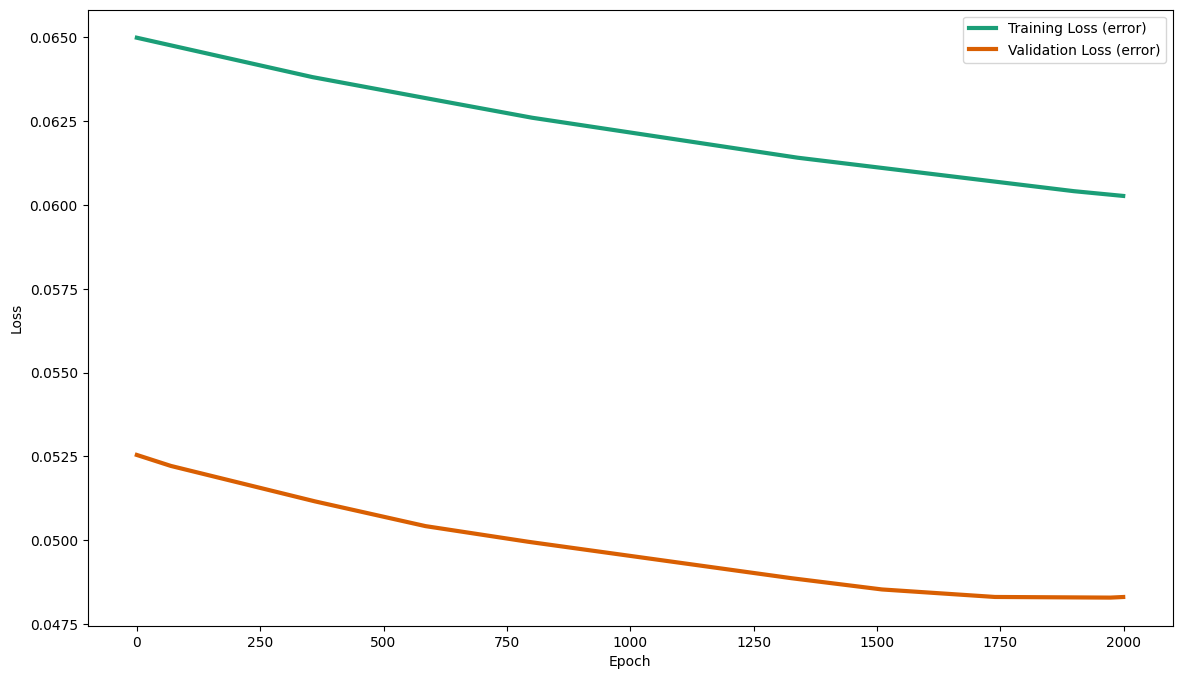

In [29]:
plt.figure(figsize = (14, 8))
plt.plot(training_loss, label='Training Loss (error)', linewidth = 3, color = '#1b9e77')
plt.plot(validation_loss, label='Validation Loss (error)', linewidth = 3, color = '#d95f02')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

/var/folders/4z/1s07dvg55sq1ks6sghlxv2rh0000gn/T/ipykernel_79805/1266801116.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', linewidth = 2, color = '#d95f02', label = 'Sin Model')


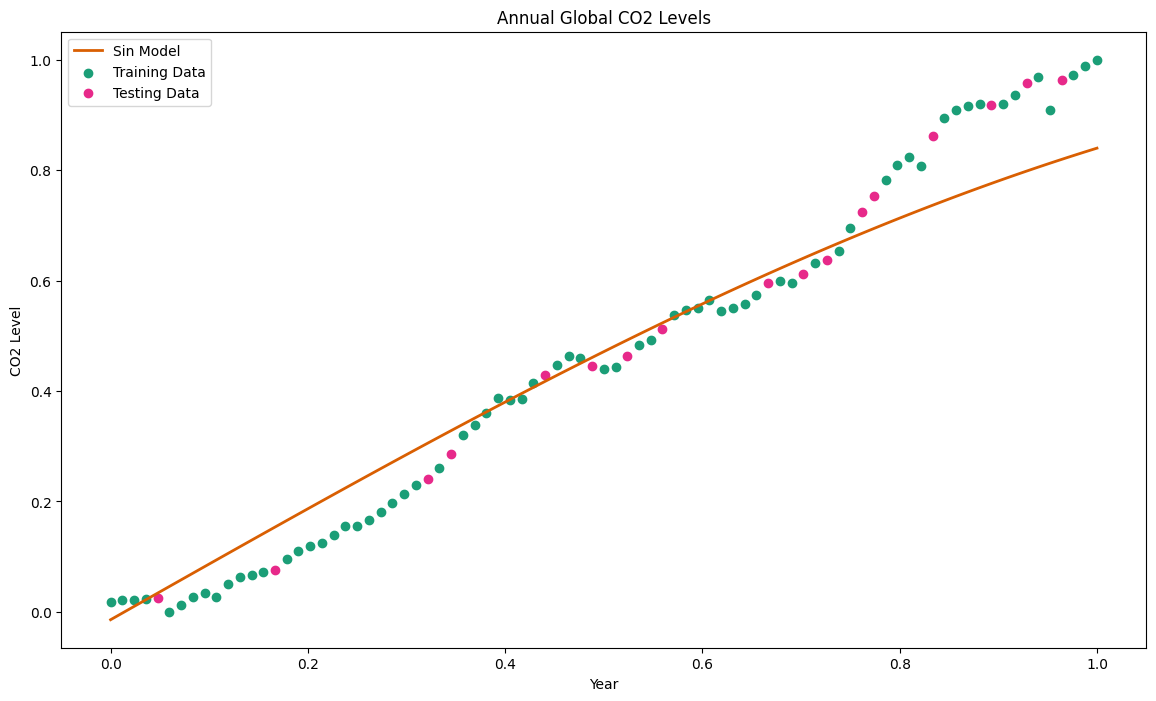

In [30]:
x = np.linspace(0, 1, 100)
y = sinModel(a, b, c, d, x)

plt.figure(figsize = (14, 8))
plt.plot(x, y, 'r', linewidth = 2, color = '#d95f02', label = 'Sin Model')
plt.scatter(x_train_val, y_train_val, color = '#1b9e77', label = 'Training Data')
plt.scatter(x_test, y_test, color = '#e7298a', label = 'Testing Data') 
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Annual Global CO2 Levels')
plt.legend()
plt.show()